✅ Anomalies détectées : 102 / 2000 (5.10%)

🔍 Exemples de transactions anormales :
                          transaction_id client_id   sexe  age ville_client  \
1   b6815a98-b83b-4862-a8a1-82f755f04b57    CL1023  Homme   47         Sfax   
13  d26801c1-7b97-463b-aade-d2cd876743de    CL1058  Homme   51     Monastir   
54  aaabd6e2-2332-4f84-b555-06908d7d5218    CL1017  Femme   40     Kairouan   
57  3482eb28-bba0-4bf0-b847-59361a9a13b4    CL1048  Homme   37         Sfax   
59  796acf49-bfd2-4aaa-b728-edb94489a900    CL1009  Homme   24       Ariana   

   pays_client  montant  frequence      lieu     pays  heure type_transaction  \
1      Tunisie  3054.90          7  Kairouan  Tunisie  02:09         virement   
13     Tunisie  1720.85         56  Monastir  Tunisie  00:50          retrait   
54     Tunisie   770.16         56      Sfax  Tunisie  01:53            achat   
57     Tunisie   723.41         10     Gabès  Tunisie  22:57            achat   
59     Tunisie  1147.43          7  M

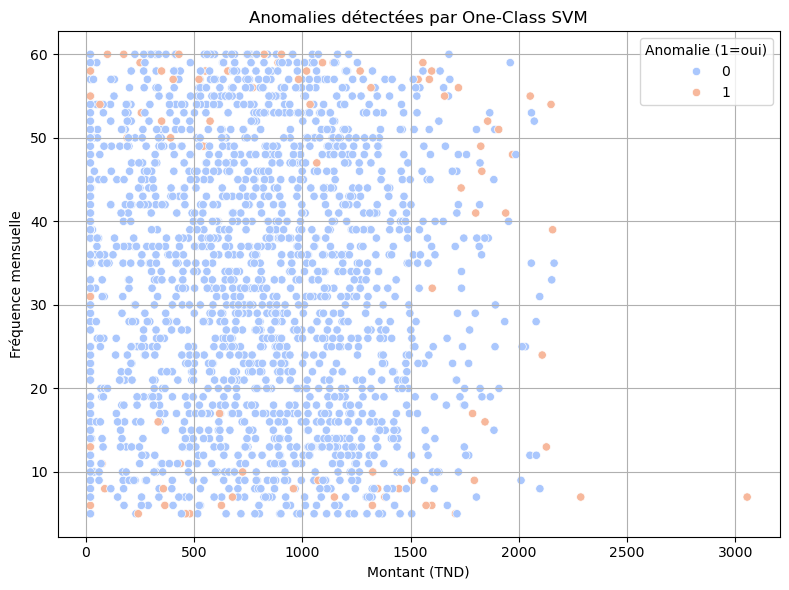


📁 Résultats sauvegardés dans 'transactions_ocsvm_result.csv'


In [25]:

# 📦 Imports nécessaires
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 🔽 Exemple : Charger ton fichier
df = pd.read_csv(r"C:\Users\MSI\Desktop\Attijari_bank\transactions_attijari_bank.csv")


# 🔧 Prétraitement
df['heure_num'] = df['heure'].str.split(':').apply(lambda x: int(x[0]) + int(x[1]) / 60)
df['type_tx_encoded'] = pd.factorize(df['type_transaction'])[0]

# 🧪 Sélection des variables pour le modèle
features = ['montant', 'frequence', 'solde_avant', 'solde_après', 'heure_num', 'type_tx_encoded']
X = df[features]

# 🔢 Normalisation
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🤖 Modèle One-Class SVM
model_ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # 5% attendus comme anomalies
model_ocsvm.fit(X_scaled)

# 🔎 Prédiction
df['anomaly_ocsvm'] = model_ocsvm.predict(X_scaled)  # -1 = anomalie, 1 = normal
df['is_anomaly_ocsvm'] = df['anomaly_ocsvm'].apply(lambda x: 1 if x == -1 else 0)

# 📊 Résumé
nb_anomalies = df['is_anomaly_ocsvm'].sum()
nb_total = len(df)
print(f"✅ Anomalies détectées : {nb_anomalies} / {nb_total} ({nb_anomalies / nb_total:.2%})")

# 👁️‍🗨️ Afficher quelques anomalies
print("\n🔍 Exemples de transactions anormales :")
print(df[df['is_anomaly_ocsvm'] == 1].head())

# 📈 Visualisation : Montant vs Fréquence
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='montant', y='frequence', hue='is_anomaly_ocsvm', palette='coolwarm')
plt.title("Anomalies détectées par One-Class SVM")
plt.xlabel("Montant (TND)")
plt.ylabel("Fréquence mensuelle")
plt.legend(title='Anomalie (1=oui)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 💾 Export des résultats
df.to_csv("transactions_ocsvm_result.csv", index=False)
print("\n📁 Résultats sauvegardés dans 'transactions_ocsvm_result.csv'")


In [27]:

nb_anomalies = df['is_anomaly_ocsvm'].sum()
print(f"✅ Nombre d'anomalies détectées : {nb_anomalies}")


✅ Nombre d'anomalies détectées : 102
